In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def show_image(image, cmap = None, fig_size = (10, 10)):
    fig, ax = plt.subplots(figsize=fig_size)
    ax.imshow(image, cmap = cmap)
    ax.axis('off')
    plt.show()

## 1. Colour Histograms

### 1.1 Histogram Calculations and Plotting

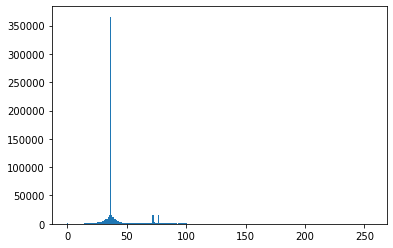

In [3]:
img = cv2.imread('../img/coding.png')
hist = cv2.calcHist([img],[0],None,[256],[0,256])

img = cv2.imread('../img/coding.png')
plt.hist(img.ravel(),256,[0,256]); 
plt.show()

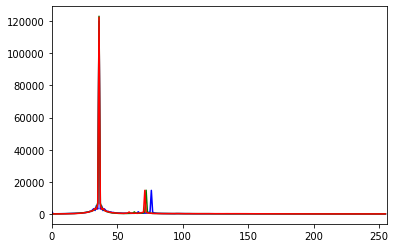

In [4]:
img = cv2.imread('../img/coding.png')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

### 1.2 Histogram Calculations and Plotting on Image Masks

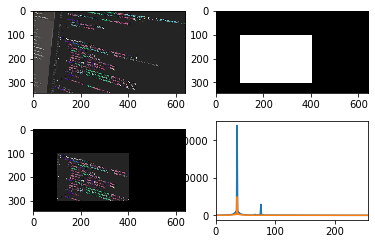

In [5]:
img = cv2.imread('../img/coding.png')

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

In [6]:
chans = cv2.split(image)
colors = ("b", "g", "r")

fig = plt.figure()
 
# plot a 2D color histogram for green and blue
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32],
    [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)
 
# plot a 2D color histogram for green and red
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32],
    [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)
 
# plot a 2D color histogram for blue and red
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32],
    [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)
 
# finally, let's examine the dimensionality of one of the 2D
# histograms
print("2D histogram shape: {}, with {} values".format(
    hist.shape, hist.flatten().shape[0]))

NameError: name 'image' is not defined

### EXERCISE: Plot histograms for an image and its mask

### 1.3 Histogram Equalisation

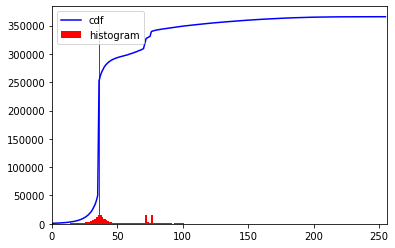

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../img/coding.png')

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [8]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [9]:
img = cv2.imread('../img/ml.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)

True

### EXERCISE: Equalise an Image